In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data_small/COMPUSTAT_vars.csv')

In [4]:
for col in data.columns:
    print(col)

Unnamed: 0
datadate
gvkey
fyearq
fqtr
fyr
indfmt
consol
popsrc
datafmt
cusip
curcdq
curncdq
currtrq
datacqtr
datafqtr
acchgq
acomincq
acoq
actq
altoq
ancq
anoq
aociderglq
aociotherq
aocipenq
aocisecglq
aol2q
aoq
apq
aqaq
aqdq
aqepsq
aqpl1q
aqpq
arcedq
arceepsq
arceq
atq
aul3q
billexceq
capr1q
capr2q
capr3q
capsftq
capsq
ceiexbillq
ceqq
cheq
chq
cibegniq
cicurrq
ciderglq
cimiiq
ciotherq
cipenq
ciq
cisecglq
citotalq
cogsq
csh12q
cshfd12
cshfdq
cshiq
cshopq
cshoq
cshprq
cstkcvq
cstkeq
cstkq
dcomq
dd1q
deracq
deraltq
derhedglq
derlcq
derlltq
diladq
dilavq
dlcq
dlttq
doq
dpacreq
dpactq
dpq
dpretq
drcq
drltq
dteaq
dtedq
dteepsq
dtepq
dvintfq
dvpq
epsf12
epsfi12
epsfiq
epsfxq
epspi12
epspiq
epspxq
epsx12
esopctq
esopnrq
esoprq
esoptq
esubq
fcaq
ffoq
finacoq
finaoq
finchq
findlcq
findltq
finivstq
finlcoq
finltoq
finnpq
finreccq
finrecltq
finrevq
finxintq
finxoprq
gdwlamq
gdwlia12
gdwliaq
gdwlid12
gdwlidq
gdwlieps12
gdwliepsq
gdwlipq
gdwlq
glaq
glcea12
glceaq
glced12
glcedq
glceeps12
glceepsq
g

In [52]:
encoder = OrdinalEncoder()
df = data[['gvkey','datafqtr', 'revtq', 'after']]
df['datafqtr'] = pd.to_datetime(df['datafqtr'])
df.loc[:,['gvkey', 'datafqtr']] = encoder.fit_transform(df[['gvkey', 'datafqtr']]).astype(np.int64)

In [139]:
pt = df.pivot_table(values=['revtq', 'after'], index='datafqtr', columns='gvkey').fillna(0)
gvkeys = pt['revtq'].columns.to_list()
quarters = df['revtq'].index.to_list()
for gk in gvkeys:
#     try:
#         index = pt['after'][gk][pt['after'][gk] == 1].index[0]
#     except IndexError:
#         index = int(pt['revtq'].shape[0] / 2)
#     if index == 0:
#         index = 1
    index = 10
    target = pt['revtq'].iloc[:index, :].loc[:, gk]
    features = pt['revtq'].iloc[:index, :].loc[:, list(set(gvkeys)- set([gk]))]
    assert target.shape[0] > 0 and features.shape[0] > 0
    model = rf(n_estimators=100)
    model.fit(features, target)
    synthetic = model.predict(pt['revtq'].loc[:, list(set(gvkeys)- set([gk]))])
    pt['synthetic', gk] = synthetic
    pt['difference', gk] = pt['synthetic', gk] - pt['revtq', gk]
    try:
        pt['qsincebreach', gk] = pt.index - pt['after'][gk][pt['after'][gk] == 1].index[0] 
    except IndexError:
        pt['qsincebreach', gk] = 0

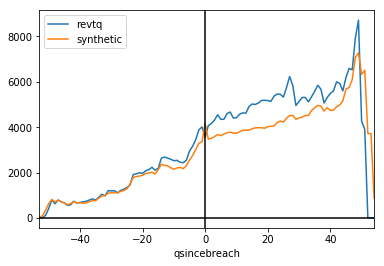

In [140]:
fig, ax = plt.subplots()
grouped = pt.stack().reset_index().groupby('qsincebreach').agg('mean').reset_index()
grouped.plot(x='qsincebreach', y='revtq', ax=ax)
grouped.plot(x='qsincebreach', y='synthetic', ax=ax)
ax.axhline(0, c='black')
ax.axvline(0, c='black')

In [134]:
grouped

,qsincebreach,datafqtr,gvkey,after,difference,revtq,synthetic
0,-53.0,0.000000,59.000000,0.000000,130.964230,0.000000,130.964230
1,-52.0,0.250000,151.750000,0.000000,105.965662,0.000000,105.965662
2,-51.0,0.714286,177.571429,0.000000,291.302674,112.646143,403.948817
3,-50.0,1.000000,224.416667,0.000000,200.106494,417.538333,617.644827
4,-49.0,1.263158,235.157895,0.000000,5.831159,801.546053,807.377212
5,-48.0,1.720000,228.080000,0.000000,103.770902,622.654240,726.425142
6,-47.0,2.428571,221.892857,0.000000,16.664761,790.195750,806.860511
7,-46.0,3.000000,239.781250,0.000000,9.961637,712.052156,722.013793
8,-45.0,3.657143,238.885714,0.000000,23.451395,659.732771,683.184166
9,-44.0,3.975610,245.073171,0.000000,35.754382,555.028000,590.782382
